#Epl matches

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/EPL_DS_Challenge/epl_matches_train.csv')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/EPL_DS_Challenge/epl_matches_test.csv')
test.head()

,season,stage,date,match_id,home_team_id,away_team_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,2015/2016,1,8/9/2015 0:00,48994,9825,8654,1,2,4,6,8,4,6,3,5,7,5,1,2,4,6,8,3,5,7,5,4,6,1,3,3,3,3,6,6,8,8,8,11,1,3,3,3,3,6,6,6,8,10,10,30859,26154.0,35606,46539,38521,159594,37436,75489.0,36378,196386,46469,169756,109897.0,35110,49543,155782,37169,575789,148302,25496,18506,192899
1,2015/2016,1,8/8/2015 0:00,54777,8678,10252,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,3,5,7,3,5,7,1,3,3,3,3,7,7,7,7,10,10,1,3,3,3,3,7,7,7,10,10,10,30974,35515.0,24625,156013,68237,155913,46810,23629.0,24381,185236,184321,69650,183500.0,24208,161414,473853,261313,179410,182223,23991,154280,23264
2,2015/2016,1,8/8/2015 0:00,31434,8455,10003,1,2,4,6,8,4,6,3,5,7,5,1,2,4,6,8,4,6,3,5,7,5,1,3,3,3,3,6,6,8,8,8,11,1,3,3,3,3,6,6,8,8,8,11,170323,31306.0,23783,30627,72541,115067,30613,94086.0,128864,107417,19243,30973,111800.0,155050,24948,102356,127130,144996,95955,157729,52563,26344
3,2015/2016,1,8/8/2015 0:00,56248,8668,9817,1,2,4,6,8,4,6,3,5,7,5,1,2,4,6,8,4,6,3,5,7,5,1,3,3,3,3,6,6,8,8,8,11,1,3,3,3,3,6,6,8,8,8,11,31465,77690.0,263653,23268,316688,23782,101192,26151.0,160713,215384,181276,30455,213809.0,41927,40548,35712,41365,30966,24915,37411,71724,72436
4,2015/2016,1,8/8/2015 0:00,44311,8197,8472,1,3,5,7,2,4,6,8,5,4,6,1,2,4,6,8,3,5,7,3,5,7,1,3,3,3,7,7,7,7,9,11,11,1,3,3,3,3,7,7,7,10,10,10,37770,67850.0,38899,23571,139671,103419,173317,214570.0,278343,20694,286119,103428,22964.0,26108,165526,180330,35443,25150,109058,24159,30348,42598


In [ ]:
teams = pd.read_csv('/content/drive/MyDrive/EPL_DS_Challenge/epl_teams.csv')

In [ ]:
train['match_result'] = 0
for i in range(len(train)):
  if train['home_team_goal'].iloc[i]>train['away_team_goal'].iloc[i]:
      train['match_result'].iloc[i] = 'won'
  elif train['home_team_goal'].iloc[i]<train['away_team_goal'].iloc[i]:
      train['match_result'].iloc[i] = 'lose'
  else:
      train['match_result'].iloc[i] = 'draw'

train.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,season,stage,date,match_id,home_team_id,away_team_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,...,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11,on_target_shot_home_team,on_target_shot_away_team,off_target_shot_home_team,off_target_shot_away_team,foul_home_team,foul_away_team,yellow_card_home_team,yellow_card_away_team,red_card_home_team,red_card_away_team,crosses_home_team,crosses_away_team,corner_home_team,corner_away_team,possession_home_team,possession_away_team,home_team_goal,away_team_goal,match_result
0,2008/2009,1,2008-08-17 00:00:00,49337,10260,10261,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,2,4,6,8,5,5,1,3,3,3,3,7,7,7,7,10,10,1,...,30362.0,30620,30865,32569.0,24148,34944.0,30373.0,24154.0,24157.0,30829.0,24224,25518.0,24228.0,30929,29581.0,38807.0,40565.0,30360.0,33852.0,34574.0,37799.0,11,1,10,9,16,11,3,0,0,0,24,9,6,6,55.0,45.0,1,1,draw
1,2008/2009,1,2008-08-16 00:00:00,38136,9825,8659,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,5,7,9,1,3,5,1,3,3,3,3,7,7,7,7,10,10,1,...,26111.0,38835,30986,31291.0,31013,30935.0,39297.0,26181.0,30960.0,36410.0,36373,36832.0,23115.0,37280,24728.0,24664.0,31088.0,23257.0,24171.0,25922.0,27267.0,12,2,13,3,11,9,0,0,0,0,21,7,7,5,66.0,34.0,1,0,won
2,2008/2009,1,2008-08-16 00:00:00,43276,8472,8650,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,2,4,6,8,4,6,1,3,3,3,3,7,7,7,7,10,10,1,...,38836.0,24446,24408,36786.0,38802,24655.0,17866.0,30352.0,23927.0,24410.0,30660,37442.0,30617.0,24134,414792.0,37139.0,30618.0,40701.0,24800.0,24635.0,30853.0,4,11,3,5,13,12,0,2,0,0,15,19,1,8,46.0,54.0,0,1,lose
3,2008/2009,1,2008-08-16 00:00:00,40671,8654,8528,1,2,4,6,8,2,4,6,8,4,6,1,2,6,8,4,2,4,6,8,4,6,1,3,3,3,3,7,7,7,7,10,10,1,...,30966.0,23818,37277,30687.0,36394,37169.0,24223.0,24773.0,34543.0,23139.0,34421,34987.0,35472.0,111865,25005.0,35327.0,25150.0,97988.0,41877.0,127857.0,34466.0,5,7,7,15,14,13,2,1,0,0,15,27,6,10,52.0,48.0,2,1,won
4,2008/2009,1,2008-08-17 00:00:00,34633,10252,8456,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,1,3,5,7,9,5,1,3,3,3,3,7,7,7,7,10,10,1,...,30357.0,24658,43280,23282.0,38609,24780.0,23782.0,23354.0,23264.0,26165.0,31432,46403.0,24208.0,23939,33963.0,47413.0,40198.0,42119.0,NaN,33633.0,107216.0,5,9,4,5,11,13,0,1,0,0,16,16,7,8,52.0,48.0,4,2,won


In [ ]:
train_data = train[['season', 'stage', 'match_id', 'home_team_id', 'away_team_id', 'match_result']]

In [ ]:
teams.head()

,team_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9825,2/22/2010 0:00,66,Balanced,NaN,Little,30,Short,Free Form,30,Safe,45,Normal,35,Normal,Free Form,30,Deep,40,Press,50,Normal,Cover
1,9825,2/22/2011 0:00,75,Fast,NaN,Little,40,Mixed,Free Form,40,Normal,45,Normal,65,Normal,Free Form,50,Medium,40,Press,45,Normal,Cover
2,9825,2/22/2012 0:00,25,Slow,NaN,Little,32,Short,Organised,41,Normal,34,Normal,30,Little,Free Form,57,Medium,57,Press,52,Normal,Cover
3,9825,9/20/2013 0:00,30,Slow,NaN,Little,29,Short,Organised,41,Normal,55,Normal,39,Normal,Free Form,64,Medium,54,Press,52,Normal,Cover
4,9825,9/19/2014 0:00,59,Balanced,51.0,Normal,26,Short,Organised,28,Safe,55,Normal,64,Normal,Free Form,51,Medium,44,Press,52,Normal,Cover


In [ ]:
team_data = teams[['team_id', 'buildUpPlaySpeed', 'buildUpPlayDribblingClass', 'buildUpPlayPassing','buildUpPlayPositioningClass', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'chanceCreationPositioningClass', 'defencePressure', 'defenceAggression', 'defenceTeamWidth', 'defenceDefenderLineClass' ]]

In [ ]:
team_data.head()

,team_id,buildUpPlaySpeed,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,chanceCreationPositioningClass,defencePressure,defenceAggression,defenceTeamWidth,defenceDefenderLineClass
0,9825,66,Little,30,Free Form,30,45,35,Free Form,30,40,50,Cover
1,9825,75,Little,40,Free Form,40,45,65,Free Form,50,40,45,Cover
2,9825,25,Little,32,Organised,41,34,30,Free Form,57,57,52,Cover
3,9825,30,Little,29,Organised,41,55,39,Free Form,64,54,52,Cover
4,9825,59,Normal,26,Organised,28,55,64,Free Form,51,44,52,Cover


In [ ]:
team_data.defenceDefenderLineClass.value_counts()

Cover    204
Name: defenceDefenderLineClass, dtype: int64

In [ ]:
team_data['buildUpPlayDribblingClass'].replace({'Little':1, 'Normal':2}, inplace = True)
team_data['buildUpPlayPositioningClass'] = pd.get_dummies(team_data['buildUpPlayPositioningClass'], drop_first=True)
team_data['chanceCreationPositioningClass'] = pd.get_dummies(team_data['chanceCreationPositioningClass'], drop_first=True)
team_data['defenceDefenderLineClass'].replace({'Cover':1}, inplace = True)
team_data.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning

,team_id,buildUpPlaySpeed,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,chanceCreationPositioningClass,defencePressure,defenceAggression,defenceTeamWidth,defenceDefenderLineClass
0,9825,66,1,30,0,30,45,35,0,30,40,50,1
1,9825,75,1,40,0,40,45,65,0,50,40,45,1
2,9825,25,1,32,1,41,34,30,0,57,57,52,1
3,9825,30,1,29,1,41,55,39,0,64,54,52,1
4,9825,59,2,26,1,28,55,64,0,51,44,52,1


In [ ]:
columns = ['buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth' ]

In [ ]:
team_id = team_data['team_id'].unique()
team_id2 = []
buildUpPlayDribblingClass = []
buildUpPlayPositioningClass = []
chanceCreationPositioningClass = []
teams_new= []
for i in team_id:
  data = team_data[team_data['team_id']==i]
  team_id2.append(i)
  buildUpPlayDribblingClass.append(data['buildUpPlayDribblingClass'].mode()[0])
  buildUpPlayPositioningClass.append(data['buildUpPlayPositioningClass'].mode()[0])
  chanceCreationPositioningClass.append(data['chanceCreationPositioningClass'].mode()[0])

  teams_new.append(data[columns].mean(skipna = True))


In [ ]:
teams_data = pd.DataFrame()
teams_data['team_id'] = team_id2
teams_data['buildUpPlayDribblingClass'] = buildUpPlayDribblingClass
teams_data['buildUpPlayPositioningClass'] = buildUpPlayPositioningClass
teams_data['chanceCreationPositioningClass'] = chanceCreationPositioningClass
teams_data['defenceDefenderLineClass'] = np.ones(len(teams_new))
teams_data[columns] = teams_new
teams_data.head()

,team_id,buildUpPlayDribblingClass,buildUpPlayPositioningClass,chanceCreationPositioningClass,defenceDefenderLineClass,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,9825,1,1,0,1.0,52.333333,31.166667,34.666667,46.333333,46.500000,50.500000,46.500000,50.500000
1,10252,1,1,1,1.0,65.666667,58.666667,54.833333,56.000000,47.333333,36.833333,48.666667,51.166667
2,8658,1,1,1,1.0,55.666667,66.000000,57.500000,64.333333,54.500000,44.666667,52.833333,55.166667
3,8655,1,1,1,1.0,52.500000,63.833333,57.000000,56.000000,42.000000,45.666667,55.000000,46.666667
4,8483,1,1,1,1.0,59.833333,56.666667,64.000000,51.166667,61.333333,48.500000,50.000000,55.166667


In [ ]:
columns = ['buildUpPlayDribblingClass','buildUpPlayPositioningClass','chanceCreationPositioningClass', 'defenceDefenderLineClass', 'buildUpPlaySpeed', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression', 'defenceTeamWidth' ]

In [ ]:
trains= pd.DataFrame()
temp = []
season = []
stage = []
match_id = []
home_team_id = []
away_team_id = []
match_result = []
buildUpPlayDribblingClass = []
buildUpPlayPositioningClass = []
chanceCreationPositioningClass = []
defenceDefenderLineClass = []
buildUpPlaySpeed = []
buildUpPlayPassing = []
chanceCreationPassing = []
chanceCreationCrossing = []
chanceCreationShooting = []
defencePressure = []
defenceAggression = []
defenceTeamWidth = []
for i in range(len(train_data['home_team_id'])):
  k = train_data['home_team_id'].iloc[i]
  team = teams_data[teams_data['team_id']== k]
  #trains.append(team['buildUpPlaySpeed'])
  season.append(train_data['season'].iloc[i])
  stage.append(train_data['stage'].iloc[i])
  match_id.append(train_data['match_id'].iloc[i])
  home_team_id.append(train_data['home_team_id'].iloc[i])
  away_team_id.append(train_data['away_team_id'].iloc[i])
  k = int(team['buildUpPlayDribblingClass'])
  buildUpPlayDribblingClass.append(k)
  #print(int(team['buildUpPlayPositioningClass']))
  #print(float(team['chanceCreationPassing']))
  buildUpPlayPositioningClass.append(int(team['buildUpPlayPositioningClass']))
  chanceCreationPositioningClass.append(int(team['chanceCreationPositioningClass']))
  defenceDefenderLineClass.append(int(team['defenceDefenderLineClass']))
  buildUpPlaySpeed.append(float(team['buildUpPlaySpeed']))
  buildUpPlayPassing.append(float(team['buildUpPlayPassing']))
  chanceCreationPassing.append(float(team['chanceCreationPassing']))
  chanceCreationCrossing.append(float(team['chanceCreationCrossing']))
  chanceCreationShooting.append(float(team['chanceCreationShooting']))
  defencePressure.append(float(team['defencePressure']))
  defenceAggression.append(float(team['defenceAggression']))
  defenceTeamWidth.append(float(team['defenceTeamWidth']))
  match_result.append(train_data['match_result'].iloc[i])

In [ ]:
trains = pd.DataFrame({'season':season, 'stage':stage, 'match_id':match_id, 'home_team_id':home_team_id, 'away_team_id':away_team_id})
trains['match_result'] = match_result
trains['buildUpPlayDribblingClass_home'] = buildUpPlayDribblingClass
trains['buildUpPlayPositioningClass_home'] = buildUpPlayPositioningClass
trains['chanceCreationPositioningClass_home'] = chanceCreationPositioningClass
trains['defenceDefenderLineClass_home'] = defenceDefenderLineClass
trains['buildUpPlaySpeed_home'] = buildUpPlaySpeed
trains['buildUpPlayPassing_home'] = buildUpPlayPassing
trains['chanceCreationPassing_home'] = chanceCreationPassing
trains['chanceCreationCrossing_home'] = chanceCreationCrossing
trains['chanceCreationShooting_home'] = chanceCreationShooting
trains['defencePressure_home'] = defencePressure
trains['defenceAggression_home'] = defenceAggression
trains['defenceTeamWidth_home'] = defenceTeamWidth
#trains.head()

In [ ]:
temp = []
season = []
stage = []
match_id = []
home_team_id = []
away_team_id = []
match_result = []
buildUpPlayDribblingClass = []
buildUpPlayPositioningClass = []
chanceCreationPositioningClass = []
defenceDefenderLineClass = []
buildUpPlaySpeed = []
buildUpPlayPassing = []
chanceCreationPassing = []
chanceCreationCrossing = []
chanceCreationShooting = []
defencePressure = []
defenceAggression = []
defenceTeamWidth = []
for i in range(len(train_data['away_team_id'])):
  k = train_data['away_team_id'].iloc[i]
  team = teams_data[teams_data['team_id']== k]
  #trains.append(team['buildUpPlaySpeed'])
  #season.append(train_data['season'].iloc[i])
  #stage.append(train_data['stage'].iloc[i])
  #match_id.append(train_data['match_id'].iloc[i])
  #home_team_id.append(train_data['home_team_id'].iloc[i])
  #away_team_id.append(train_data['away_team_id'].iloc[i])
  p = int(team['buildUpPlayDribblingClass'])
  buildUpPlayDribblingClass.append(p)
  #print(int(team['buildUpPlayPositioningClass']))
  #print(float(team['chanceCreationPassing']))
  buildUpPlayPositioningClass.append(int(team['buildUpPlayPositioningClass']))
  chanceCreationPositioningClass.append(int(team['chanceCreationPositioningClass']))
  defenceDefenderLineClass.append(int(team['defenceDefenderLineClass']))
  buildUpPlaySpeed.append(float(team['buildUpPlaySpeed']))
  buildUpPlayPassing.append(float(team['buildUpPlayPassing']))
  chanceCreationPassing.append(float(team['chanceCreationPassing']))
  chanceCreationCrossing.append(float(team['chanceCreationCrossing']))
  chanceCreationShooting.append(float(team['chanceCreationShooting']))
  defencePressure.append(float(team['defencePressure']))
  defenceAggression.append(float(team['defenceAggression']))
  defenceTeamWidth.append(float(team['defenceTeamWidth']))
  #match_result.append(train_data['match_result'].iloc[i])

In [ ]:
#trains = pd.DataFrame({'season':season, 'stage':stage, 'match_id':match_id, 'home_team_id':home_team_id, 'away_team_id':away_team_id})
#trains['match_result'] = match_result
trains['buildUpPlayDribblingClass_away'] = buildUpPlayDribblingClass
trains['buildUpPlayPositioningClass_away'] = buildUpPlayPositioningClass
trains['chanceCreationPositioningClass_away'] = chanceCreationPositioningClass
trains['defenceDefenderLineClass_away'] = defenceDefenderLineClass
trains['buildUpPlaySpeed_away'] = buildUpPlaySpeed
trains['buildUpPlayPassing_away'] = buildUpPlayPassing
trains['chanceCreationPassing_away'] = chanceCreationPassing
trains['chanceCreationCrossing_away'] = chanceCreationCrossing
trains['chanceCreationShooting_away'] = chanceCreationShooting
trains['defencePressure_away'] = defencePressure
trains['defenceAggression_away'] = defenceAggression
trains['defenceTeamWidth_away'] = defenceTeamWidth
trains.head()

,season,stage,match_id,home_team_id,away_team_id,match_result,buildUpPlayDribblingClass_home,buildUpPlayPositioningClass_home,chanceCreationPositioningClass_home,defenceDefenderLineClass_home,buildUpPlaySpeed_home,buildUpPlayPassing_home,chanceCreationPassing_home,chanceCreationCrossing_home,chanceCreationShooting_home,defencePressure_home,defenceAggression_home,defenceTeamWidth_home,buildUpPlayDribblingClass_away,buildUpPlayPositioningClass_away,chanceCreationPositioningClass_away,defenceDefenderLineClass_away,buildUpPlaySpeed_away,buildUpPlayPassing_away,chanceCreationPassing_away,chanceCreationCrossing_away,chanceCreationShooting_away,defencePressure_away,defenceAggression_away,defenceTeamWidth_away
0,2008/2009,1,49337,10260,10261,draw,1,1,1,1,51.833333,45.833333,50.000000,63.166667,53.833333,45.000000,48.000000,54.833333,1,1,1,1,58.166667,55.333333,53.500000,57.333333,49.833333,46.666667,48.333333,48.333333
1,2008/2009,1,38136,9825,8659,won,1,1,0,1,52.333333,31.166667,34.666667,46.333333,46.500000,50.500000,46.500000,50.500000,1,1,1,1,57.500000,51.500000,53.000000,56.000000,54.666667,43.000000,45.666667,54.833333
2,2008/2009,1,43276,8472,8650,lose,1,1,1,1,57.000000,60.833333,56.666667,55.333333,59.000000,43.666667,52.166667,51.833333,1,1,1,1,57.666667,44.333333,41.333333,47.833333,57.333333,51.000000,52.500000,56.000000
3,2008/2009,1,40671,8654,8528,won,1,1,1,1,62.833333,55.333333,50.333333,65.500000,40.500000,32.500000,42.833333,40.166667,1,1,1,1,47.166667,50.666667,52.666667,55.500000,45.500000,50.000000,54.000000,46.000000
4,2008/2009,1,34633,10252,8456,won,1,1,1,1,65.666667,58.666667,54.833333,56.000000,47.333333,36.833333,48.666667,51.166667,1,1,0,1,56.500000,44.500000,45.666667,50.333333,52.833333,48.666667,52.500000,51.833333


In [ ]:
columns = trains.columns[6:]

In [ ]:
columns

Index(['buildUpPlayDribblingClass_home', 'buildUpPlayPositioningClass_home',
       'chanceCreationPositioningClass_home', 'defenceDefenderLineClass_home',
       'buildUpPlaySpeed_home', 'buildUpPlayPassing_home',
       'chanceCreationPassing_home', 'chanceCreationCrossing_home',
       'chanceCreationShooting_home', 'defencePressure_home',
       'defenceAggression_home', 'defenceTeamWidth_home',
       'buildUpPlayDribblingClass_away', 'buildUpPlayPositioningClass_away',
       'chanceCreationPositioningClass_away', 'defenceDefenderLineClass_away',
       'buildUpPlaySpeed_away', 'buildUpPlayPassing_away',
       'chanceCreationPassing_away', 'chanceCreationCrossing_away',
       'chanceCreationShooting_away', 'defencePressure_away',
       'defenceAggression_away', 'defenceTeamWidth_away'],
      dtype='object')

In [ ]:
trains.drop(['season', 'stage', 'match_id', 'home_team_id', 'away_team_id', 'buildUpPlayDribblingClass_home', 'buildUpPlayPositioningClass_home', 'defenceDefenderLineClass_home', 'defenceDefenderLineClass_away','buildUpPlayPositioningClass_away', 'buildUpPlayDribblingClass_away' ], axis = 1, inplace = True)

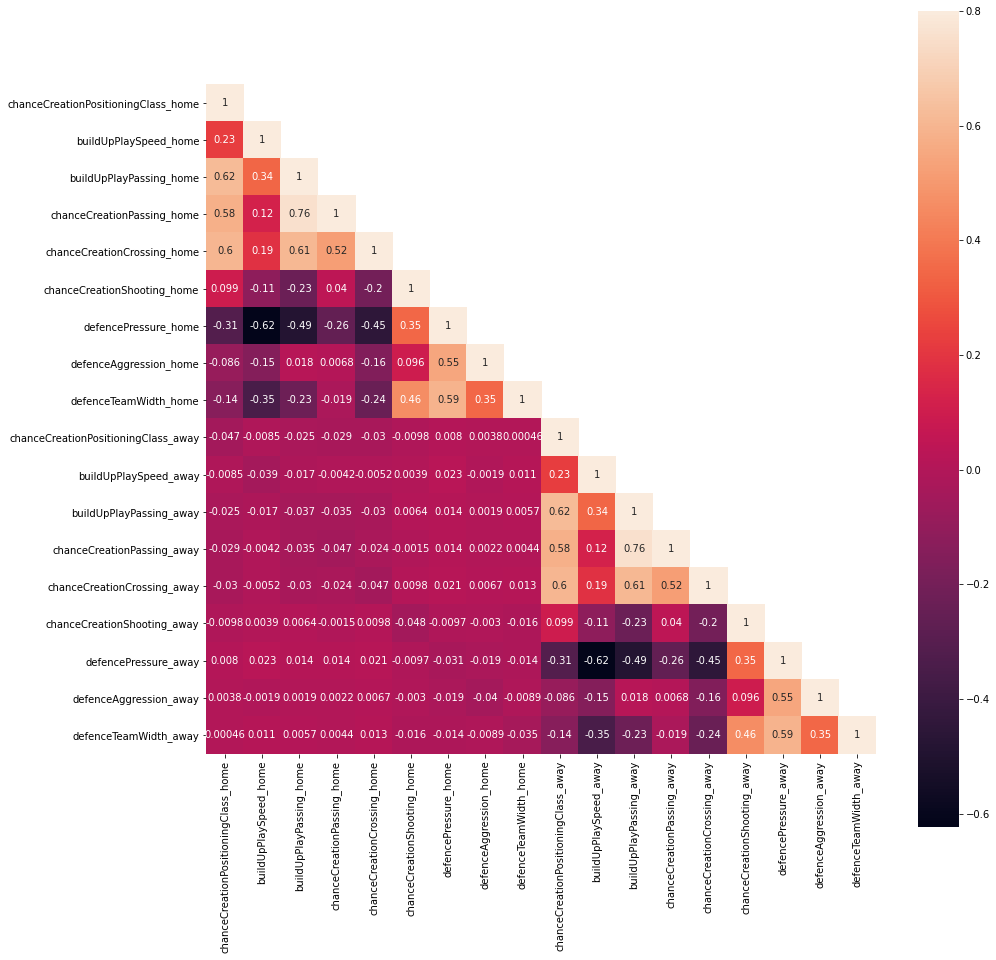

In [ ]:
mat = trains.drop('match_result', axis = 1)
import matplotlib.pyplot as plt
import seaborn as sns
corrMat = mat.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(corrMat, mask = mask, vmax = 0.8, square = True, annot = True)
plt.show()

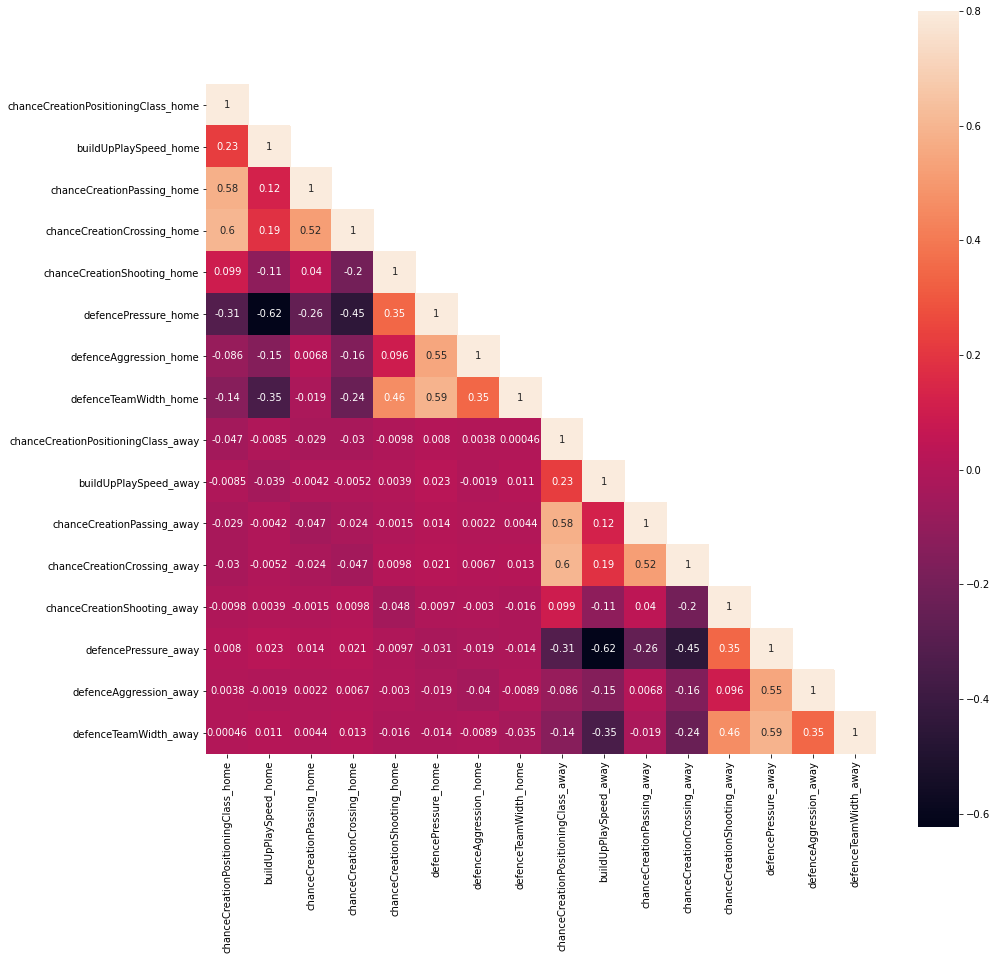

In [ ]:
trains.drop(['buildUpPlayPassing_home', 'buildUpPlayPassing_away'], axis = 1, inplace = True)
mat = trains.drop('match_result', axis = 1)
import matplotlib.pyplot as plt
import seaborn as sns
corrMat = mat.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(15, 15)
sns.heatmap(corrMat, mask = mask, vmax = 0.8, square = True, annot = True)
plt.show()

In [ ]:
trains['match_result'].replace({'lose':0, 'draw':1, 'won':2}, inplace = True)

In [ ]:
X = trains.drop( 'match_result', axis = 1)
Y = trains['match_result']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X,Y)

In [ ]:
models = [LogisticRegression(), SGDClassifier(), RandomForestClassifier(), AdaBoostClassifier(), BaggingClassifier(), XGBClassifier(), DecisionTreeClassifier(), KNeighborsClassifier(), SVC()]

model_names = [ 'Logistic Regression', 'SGDClassifier', 'Random forest', 'Adaboost', 'Bagging','XGBoost', 'DecisionTree', 'K nearest neighbors',  'SVC']

accuracy = []
for model in range(len(models)):
    mod = models[model]
    mod.fit(train_x, train_y)
    pred = mod.predict(test_x)
    #print(model)
    accuracy.append(accuracy_score(test_y, pred))

result = {'model names':model_names, 'Accuracy': accuracy}
result = pd.DataFrame(result)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
result

,model names,Accuracy
0,Logistic Regression,0.515789
1,SGDClassifier,0.291729
2,Random forest,0.454135
3,Adaboost,0.526316
4,Bagging,0.425564
5,XGBoost,0.515789
6,DecisionTree,0.406015
7,K nearest neighbors,0.431579
8,SVC,0.493233


In [ ]:
boost = AdaBoostClassifier()

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=30, stop = 300, num = 10)]
learning_rate  = [0.5,0.05,1,1.5,2]

random_grid = {
    'n_estimators':n_estimators,
    'learning_rate': learning_rate
  
}
rf_random = RandomizedSearchCV(estimator=boost, param_distributions=random_grid, n_iter = 100, cv = 5, verbose=2, n_jobs=-1)
rf_random.fit(train_x, train_y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 50 is smaller than n_iter=100. Running 50 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=None,
                                                learning_rate=1.0,
                                                n_estimators=50,
                                                random_state=None),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'learning_rate': [0.5, 0.05, 1, 1.5, 2],
                                        'n_estimators': [30, 60, 90, 120, 150,
                                                         180, 210, 240, 270,
                                                         300]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [ ]:
rf_random.best_params_

{'learning_rate': 0.05, 'n_estimators': 270}

In [ ]:
!pip install tpot

     |████████████████████████████████| 92kB 3.6MB/s 
     |████████████████████████████████| 163kB 7.2MB/s 
     |████████████████████████████████| 157.5MB 71kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-cp37-none-any.whl size=11954 sha256=9e54f67b281ed01f6625c1ce6e53b830bde8c39b1816af6318884c970bbf42b1
  Stored in directory: /root/.cache/pip/wheels/3c/85/2b/2580190404636bfc63e8de3dff629c03bb795021e1983a6cc7
Successfully built stopit
  Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
from tpot import TPOTClassifier

tpot_classifier = TPOTClassifier(generations= 5, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict={'sklearn.ensemble.AdaBoostClassifier': random_grid}, 
                                 cv = 4, scoring = None)

In [ ]:
tpot_classifier.fit(train_x,train_y)


Generation 1 - Current best internal CV score: 0.5288297478491119

Generation 2 - Current best internal CV score: 0.5288297478491119

Generation 3 - Current best internal CV score: 0.5293347739656019

Generation 4 - Current best internal CV score: 0.5293347739656019

Generation 5 - Current best internal CV score: 0.5293347739656019

Best pipeline: AdaBoostClassifier(CombineDFs(input_matrix, input_matrix), learning_rate=0.05, n_estimators=270)


TPOTClassifier(config_dict={'sklearn.ensemble.AdaBoostClassifier': {'learning_rate': [0.5,
                                                                                      0.05,
                                                                                      1,
                                                                                      1.5,
                                                                                      2],
                                                                    'n_estimators': [30,
                                                                                     60,
                                                                                     90,
                                                                                     120,
                                                                                     150,
                                                                                     180,
          

In [ ]:
pred_gen = tpot_classifier.predict(test_x)
accuracy_score(test_y, pred_gen)

0.5203007518796993

In [ ]:
best_est = rf_random.best_estimator_
pred_best = best_est.predict(test_x)
accuracy_score(test_y, pred_best)

0.5203007518796993

In [ ]:
test.head()

,season,stage,date,match_id,home_team_id,away_team_id,home_player_X1,home_player_X2,home_player_X3,home_player_X4,home_player_X5,home_player_X6,home_player_X7,home_player_X8,home_player_X9,home_player_X10,home_player_X11,away_player_X1,away_player_X2,away_player_X3,away_player_X4,away_player_X5,away_player_X6,away_player_X7,away_player_X8,away_player_X9,away_player_X10,away_player_X11,home_player_Y1,home_player_Y2,home_player_Y3,home_player_Y4,home_player_Y5,home_player_Y6,home_player_Y7,home_player_Y8,home_player_Y9,home_player_Y10,home_player_Y11,away_player_Y1,away_player_Y2,away_player_Y3,away_player_Y4,away_player_Y5,away_player_Y6,away_player_Y7,away_player_Y8,away_player_Y9,away_player_Y10,away_player_Y11,home_player_1,home_player_2,home_player_3,home_player_4,home_player_5,home_player_6,home_player_7,home_player_8,home_player_9,home_player_10,home_player_11,away_player_1,away_player_2,away_player_3,away_player_4,away_player_5,away_player_6,away_player_7,away_player_8,away_player_9,away_player_10,away_player_11
0,2015/2016,1,8/9/2015 0:00,48994,9825,8654,1,2,4,6,8,4,6,3,5,7,5,1,2,4,6,8,3,5,7,5,4,6,1,3,3,3,3,6,6,8,8,8,11,1,3,3,3,3,6,6,6,8,10,10,30859,26154.0,35606,46539,38521,159594,37436,75489.0,36378,196386,46469,169756,109897.0,35110,49543,155782,37169,575789,148302,25496,18506,192899
1,2015/2016,1,8/8/2015 0:00,54777,8678,10252,1,2,4,6,8,2,4,6,8,4,6,1,2,4,6,8,3,5,7,3,5,7,1,3,3,3,3,7,7,7,7,10,10,1,3,3,3,3,7,7,7,10,10,10,30974,35515.0,24625,156013,68237,155913,46810,23629.0,24381,185236,184321,69650,183500.0,24208,161414,473853,261313,179410,182223,23991,154280,23264
2,2015/2016,1,8/8/2015 0:00,31434,8455,10003,1,2,4,6,8,4,6,3,5,7,5,1,2,4,6,8,4,6,3,5,7,5,1,3,3,3,3,6,6,8,8,8,11,1,3,3,3,3,6,6,8,8,8,11,170323,31306.0,23783,30627,72541,115067,30613,94086.0,128864,107417,19243,30973,111800.0,155050,24948,102356,127130,144996,95955,157729,52563,26344
3,2015/2016,1,8/8/2015 0:00,56248,8668,9817,1,2,4,6,8,4,6,3,5,7,5,1,2,4,6,8,4,6,3,5,7,5,1,3,3,3,3,6,6,8,8,8,11,1,3,3,3,3,6,6,8,8,8,11,31465,77690.0,263653,23268,316688,23782,101192,26151.0,160713,215384,181276,30455,213809.0,41927,40548,35712,41365,30966,24915,37411,71724,72436
4,2015/2016,1,8/8/2015 0:00,44311,8197,8472,1,3,5,7,2,4,6,8,5,4,6,1,2,4,6,8,3,5,7,3,5,7,1,3,3,3,7,7,7,7,9,11,11,1,3,3,3,3,7,7,7,10,10,10,37770,67850.0,38899,23571,139671,103419,173317,214570.0,278343,20694,286119,103428,22964.0,26108,165526,180330,35443,25150,109058,24159,30348,42598


In [ ]:
teams_data.head()

,team_id,buildUpPlayDribblingClass,buildUpPlayPositioningClass,chanceCreationPositioningClass,defenceDefenderLineClass,buildUpPlaySpeed,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,9825,1,1,0,1.0,52.333333,31.166667,34.666667,46.333333,46.500000,50.500000,46.500000,50.500000
1,10252,1,1,1,1.0,65.666667,58.666667,54.833333,56.000000,47.333333,36.833333,48.666667,51.166667
2,8658,1,1,1,1.0,55.666667,66.000000,57.500000,64.333333,54.500000,44.666667,52.833333,55.166667
3,8655,1,1,1,1.0,52.500000,63.833333,57.000000,56.000000,42.000000,45.666667,55.000000,46.666667
4,8483,1,1,1,1.0,59.833333,56.666667,64.000000,51.166667,61.333333,48.500000,50.000000,55.166667


In [ ]:
tests= pd.DataFrame()
temp = []
season = []
stage = []
match_id = []
home_team_id = []
away_team_id = []
match_result = []
buildUpPlayDribblingClass = []
buildUpPlayPositioningClass = []
chanceCreationPositioningClass = []
defenceDefenderLineClass = []
buildUpPlaySpeed = []
buildUpPlayPassing = []
chanceCreationPassing = []
chanceCreationCrossing = []
chanceCreationShooting = []
defencePressure = []
defenceAggression = []
defenceTeamWidth = []
for i in range(len(test['home_team_id'])):
  k = test['home_team_id'].iloc[i]
  team = teams_data[teams_data['team_id']== k]
  #trains.append(team['buildUpPlaySpeed'])
  season.append(test['season'].iloc[i])
  stage.append(test['stage'].iloc[i])
  match_id.append(test['match_id'].iloc[i])
  home_team_id.append(test['home_team_id'].iloc[i])
  away_team_id.append(test['away_team_id'].iloc[i])
  k = int(team['buildUpPlayDribblingClass'])
  buildUpPlayDribblingClass.append(k)
  #print(int(team['buildUpPlayPositioningClass']))
  #print(float(team['chanceCreationPassing']))
  buildUpPlayPositioningClass.append(int(team['buildUpPlayPositioningClass']))
  chanceCreationPositioningClass.append(int(team['chanceCreationPositioningClass']))
  defenceDefenderLineClass.append(int(team['defenceDefenderLineClass']))
  buildUpPlaySpeed.append(float(team['buildUpPlaySpeed']))
  buildUpPlayPassing.append(float(team['buildUpPlayPassing']))
  chanceCreationPassing.append(float(team['chanceCreationPassing']))
  chanceCreationCrossing.append(float(team['chanceCreationCrossing']))
  chanceCreationShooting.append(float(team['chanceCreationShooting']))
  defencePressure.append(float(team['defencePressure']))
  defenceAggression.append(float(team['defenceAggression']))
  defenceTeamWidth.append(float(team['defenceTeamWidth']))
  #match_result.append(train_data['match_result'].iloc[i])

In [ ]:
tests = pd.DataFrame({'season':season, 'stage':stage, 'match_id':match_id, 'home_team_id':home_team_id, 'away_team_id':away_team_id})
#tests['match_result'] = match_result
tests['buildUpPlayDribblingClass_home'] = buildUpPlayDribblingClass
tests['buildUpPlayPositioningClass_home'] = buildUpPlayPositioningClass
tests['chanceCreationPositioningClass_home'] = chanceCreationPositioningClass
tests['defenceDefenderLineClass_home'] = defenceDefenderLineClass
tests['buildUpPlaySpeed_home'] = buildUpPlaySpeed
tests['buildUpPlayPassing_home'] = buildUpPlayPassing
tests['chanceCreationPassing_home'] = chanceCreationPassing
tests['chanceCreationCrossing_home'] = chanceCreationCrossing
tests['chanceCreationShooting_home'] = chanceCreationShooting
tests['defencePressure_home'] = defencePressure
tests['defenceAggression_home'] = defenceAggression
tests['defenceTeamWidth_home'] = defenceTeamWidth
tests.head()

,season,stage,match_id,home_team_id,away_team_id,buildUpPlayDribblingClass_home,buildUpPlayPositioningClass_home,chanceCreationPositioningClass_home,defenceDefenderLineClass_home,buildUpPlaySpeed_home,buildUpPlayPassing_home,chanceCreationPassing_home,chanceCreationCrossing_home,chanceCreationShooting_home,defencePressure_home,defenceAggression_home,defenceTeamWidth_home
0,2015/2016,1,48994,9825,8654,1,1,0,1,52.333333,31.166667,34.666667,46.333333,46.500000,50.500000,46.500000,50.500000
1,2015/2016,1,54777,8678,10252,1,1,1,1,50.000000,52.500000,56.833333,49.833333,49.833333,48.166667,52.666667,61.000000
2,2015/2016,1,31434,8455,10003,1,1,1,1,61.666667,45.000000,49.833333,55.166667,61.666667,40.833333,50.333333,44.833333
3,2015/2016,1,56248,8668,9817,1,1,1,1,56.333333,52.500000,48.166667,58.000000,49.833333,48.333333,57.500000,56.333333
4,2015/2016,1,44311,8197,8472,1,1,1,1,53.666667,54.333333,49.333333,60.000000,54.000000,55.500000,55.833333,55.833333


In [ ]:
temp = []
season = []
stage = []
match_id = []
home_team_id = []
away_team_id = []
match_result = []
buildUpPlayDribblingClass = []
buildUpPlayPositioningClass = []
chanceCreationPositioningClass = []
defenceDefenderLineClass = []
buildUpPlaySpeed = []
buildUpPlayPassing = []
chanceCreationPassing = []
chanceCreationCrossing = []
chanceCreationShooting = []
defencePressure = []
defenceAggression = []
defenceTeamWidth = []
for i in range(len(test['away_team_id'])):
  k = test['away_team_id'].iloc[i]
  team = teams_data[teams_data['team_id']== k]
  #trains.append(team['buildUpPlaySpeed'])
  #season.append(train_data['season'].iloc[i])
  #stage.append(train_data['stage'].iloc[i])
  #match_id.append(train_data['match_id'].iloc[i])
  #home_team_id.append(train_data['home_team_id'].iloc[i])
  #away_team_id.append(train_data['away_team_id'].iloc[i])
  p = int(team['buildUpPlayDribblingClass'])
  buildUpPlayDribblingClass.append(p)
  #print(int(team['buildUpPlayPositioningClass']))
  #print(float(team['chanceCreationPassing']))
  buildUpPlayPositioningClass.append(int(team['buildUpPlayPositioningClass']))
  chanceCreationPositioningClass.append(int(team['chanceCreationPositioningClass']))
  defenceDefenderLineClass.append(int(team['defenceDefenderLineClass']))
  buildUpPlaySpeed.append(float(team['buildUpPlaySpeed']))
  buildUpPlayPassing.append(float(team['buildUpPlayPassing']))
  chanceCreationPassing.append(float(team['chanceCreationPassing']))
  chanceCreationCrossing.append(float(team['chanceCreationCrossing']))
  chanceCreationShooting.append(float(team['chanceCreationShooting']))
  defencePressure.append(float(team['defencePressure']))
  defenceAggression.append(float(team['defenceAggression']))
  defenceTeamWidth.append(float(team['defenceTeamWidth']))
  #match_result.append(train_data['match_result'].iloc[i])

In [ ]:
#trains = pd.DataFrame({'season':season, 'stage':stage, 'match_id':match_id, 'home_team_id':home_team_id, 'away_team_id':away_team_id})
#trains['match_result'] = match_result
tests['buildUpPlayDribblingClass_away'] = buildUpPlayDribblingClass
tests['buildUpPlayPositioningClass_away'] = buildUpPlayPositioningClass
tests['chanceCreationPositioningClass_away'] = chanceCreationPositioningClass
tests['defenceDefenderLineClass_away'] = defenceDefenderLineClass
tests['buildUpPlaySpeed_away'] = buildUpPlaySpeed
tests['buildUpPlayPassing_away'] = buildUpPlayPassing
tests['chanceCreationPassing_away'] = chanceCreationPassing
tests['chanceCreationCrossing_away'] = chanceCreationCrossing
tests['chanceCreationShooting_away'] = chanceCreationShooting
tests['defencePressure_away'] = defencePressure
tests['defenceAggression_away'] = defenceAggression
tests['defenceTeamWidth_away'] = defenceTeamWidth
tests.head()

,season,stage,match_id,home_team_id,away_team_id,buildUpPlayDribblingClass_home,buildUpPlayPositioningClass_home,chanceCreationPositioningClass_home,defenceDefenderLineClass_home,buildUpPlaySpeed_home,buildUpPlayPassing_home,chanceCreationPassing_home,chanceCreationCrossing_home,chanceCreationShooting_home,defencePressure_home,defenceAggression_home,defenceTeamWidth_home,buildUpPlayDribblingClass_away,buildUpPlayPositioningClass_away,chanceCreationPositioningClass_away,defenceDefenderLineClass_away,buildUpPlaySpeed_away,buildUpPlayPassing_away,chanceCreationPassing_away,chanceCreationCrossing_away,chanceCreationShooting_away,defencePressure_away,defenceAggression_away,defenceTeamWidth_away
0,2015/2016,1,48994,9825,8654,1,1,0,1,52.333333,31.166667,34.666667,46.333333,46.500000,50.500000,46.500000,50.500000,1,1,1,1,62.833333,55.333333,50.333333,65.500000,40.500000,32.500000,42.833333,40.166667
1,2015/2016,1,54777,8678,10252,1,1,1,1,50.000000,52.500000,56.833333,49.833333,49.833333,48.166667,52.666667,61.000000,1,1,1,1,65.666667,58.666667,54.833333,56.000000,47.333333,36.833333,48.666667,51.166667
2,2015/2016,1,31434,8455,10003,1,1,1,1,61.666667,45.000000,49.833333,55.166667,61.666667,40.833333,50.333333,44.833333,1,1,0,1,51.000000,40.500000,48.000000,48.166667,54.333333,49.333333,56.333333,57.833333
3,2015/2016,1,56248,8668,9817,1,1,1,1,56.333333,52.500000,48.166667,58.000000,49.833333,48.333333,57.500000,56.333333,1,1,0,1,64.833333,57.000000,55.833333,53.500000,54.333333,46.000000,53.833333,51.833333
4,2015/2016,1,44311,8197,8472,1,1,1,1,53.666667,54.333333,49.333333,60.000000,54.000000,55.500000,55.833333,55.833333,1,1,1,1,57.000000,60.833333,56.666667,55.333333,59.000000,43.666667,52.166667,51.833333


In [ ]:
test_X = tests.drop(['season', 'stage', 'match_id', 'home_team_id', 'away_team_id', 'buildUpPlayDribblingClass_home', 'buildUpPlayPositioningClass_home', 'defenceDefenderLineClass_home', 'defenceDefenderLineClass_away','buildUpPlayPositioningClass_away', 'buildUpPlayDribblingClass_away', 'buildUpPlayPassing_home', 'buildUpPlayPassing_away'], axis = 1)


In [ ]:
#lr = LogisticRegression()
boost.fit(train_x, train_y)
predict = boost.predict(test_X)

In [ ]:
predict = pd.DataFrame(predict)
map = {0:'lose', 1:'draw', 2:'win'}
predict.replace(map, inplace = True)


In [ ]:
predict.head()

,0
0,win
1,draw
2,win
3,win
4,win


In [ ]:
df = pd.DataFrame({'season':tests['season'], 'stage':tests['stage'],'match_id':tests['match_id'], 'home_team_id':tests['home_team_id'], 'away_team_id':tests['away_team_id'], 'winning_prediction': predict[0] })

In [ ]:
df.head()

,season,stage,match_id,home_team_id,away_team_id,winning_prediction
0,2015/2016,1,48994,9825,8654,win
1,2015/2016,1,54777,8678,10252,draw
2,2015/2016,1,31434,8455,10003,win
3,2015/2016,1,56248,8668,9817,win
4,2015/2016,1,44311,8197,8472,win


In [ ]:
df.to_csv('/content/drive/MyDrive/EPL_DS_Challenge/prediction_submission.csv')